In [1]:
import pandas as pd
import numpy as np
import missingno as msn

import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

## Train

### Archivo products.csv

In [2]:
products = pd.read_csv("../data/products.csv")

print(f"Dimension: {products.shape}")
print(f"Cabecera {list(products.columns)}")

Dimension: (15238, 4)
Cabecera ['product_id', 'family_id', 'subfamily_id', 'price']


### Archivo stock_and_sales_day_0_day_63.csv

In [3]:
products_stock_ventas = pd.read_csv("../data/stock_and_sales_day_0_day_63.csv")

print(f"Dimension: {products_stock_ventas.shape}")
print(f"Cabecera {list(products_stock_ventas.columns)}")

Dimension: (2421061, 6)
Cabecera ['date_number', 'product_id', 'color_id', 'size_id', 'sales', 'stock']


In [4]:
# products_stock_ventas.head()

### Archivo product_blocks.csv

In [5]:
products_blocks = pd.read_csv("../data/product_blocks.csv")

print(f"Dimension: {products_blocks.shape}")
print(f"Cabecera {list(products_blocks.columns)}")

Dimension: (15238, 2)
Cabecera ['product_id', 'block_id']


In [6]:
# products_blocks.head()

### Archivo positions_day_0_day_63.csv

In [7]:
product_positions_0_63 = pd.read_csv("../data/positions_day_0_day_63.csv")

print(f"Dimension: {product_positions_0_63.shape}")
print(f"Cabecera {list(product_positions_0_63.columns)}")

Dimension: (969897, 4)
Cabecera ['date_number', 'product_id', 'category_id', 'position']


In [8]:
# product_positions_0_63.head()

## Test

In [9]:
product_stock_70= pd.read_csv("../data/stock_day_71_stock_replenishment_days_72-77.csv")


In [10]:
product_positions_71 = pd.read_csv("../data/positions_day_71.csv")

# Dataframe Train

In [11]:
train = pd.merge(products,products_blocks,how='inner',on='product_id')

In [12]:
train.shape

(15238, 5)

Join con ventas

In [13]:
train = pd.merge(train,products_stock_ventas,how='inner',on='product_id')

In [14]:
train.shape

(2421061, 10)

## Train 1 

In [16]:
train_g = train.groupby(['product_id','date_number']).agg({'price':'max',
                                                 'color_id':'count',
                                                 'color_id':pd.Series.nunique,
                                                 'size_id':'count',
                                                 'sales':'sum',
                                                 'stock':'sum',
                                                 'block_id':'max',
                                                 'family_id':np.unique,
                                                 'subfamily_id':np.unique})

In [26]:
train_g.shape

(418064, 8)

In [17]:
train_g.head()

price  color_id  size_id  sales  stock  block_id  \
product_id date_number                                                     
151926     59           25.95         1        4      5    155      1969   
           60           25.95         1        5     10    330      1969   
           61           25.95         1        5      9    308      1969   
           62           25.95         1        5      9    289      1969   
           63           25.95         1        5      8    261      1969   

                        family_id  subfamily_id  
product_id date_number                           
151926     59           396066037     335531561  
           60           396066037     335531561  
           61           396066037     335531561  
           62           396066037     335531561  
           63           396066037     335531561

In [59]:
train.size_id.unique()

array([111455099, 242364222, 513017386, 820445075,  54666687,   3000471,
       319419383, 422108434, 558685710, 600575761, 674701524, 941322277,
         7026791,   8015276, 452052101, 541898038, 560206786, 843639151,
       108454628, 182555396, 421635475, 489270175, 642148717,  90614934,
       254705979, 632558253, 124455800, 350037367, 436761077, 704351195,
       727657238, 792872119, 912547955, 866775388, 402324861,  19663886,
       100083842, 320597084, 521719317, 730692071, 783782848, 208196760,
       329816267, 333313752, 806347791, 473452736, 647210896, 724094920,
       985347357, 600306727, 628894442, 452725255, 627547010, 589905013,
        48794687, 187580152, 401848970, 863107089, 864751709, 836111865,
       694499193, 729830141, 777299664, 811594435, 882570990, 656554948,
       814568651, 925899231, 340672953, 385182788, 389958960, 543111919,
       779486758, 357800346, 216812755,  51344302, 450460304, 243332423,
       873802179, 742319588])

## Train 2

Está agrupado de al reves. Es la agrupación que recomienda rodri

In [20]:
train_g2 = train.groupby(['date_number','product_id']).agg({'price':'max',
                                                'color_id':pd.Series.nunique,
                                                 'size_id':pd.Series.nunique,
                                                 'sales':'sum',
                                                 'stock':'sum',
                                                 'block_id':'max',
                                                 'family_id':np.unique,
                                                 'subfamily_id':np.unique})

Para verificar que los datos están correctas

In [21]:
train_g2.loc[63,151926,:]

,,price,color_id,size_id,sales,stock,block_id,family_id,subfamily_id
date_number,product_id,,,,,,,,
63,151926,25.95,1,5,8,261,1969,396066037,335531561


In [22]:
train.loc[(train.product_id==151926) & (train['date_number'] == 63)]

,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
19,151926,396066037,335531561,25.95,1969,63,909958217,54666687,0,61
20,151926,396066037,335531561,25.95,1969,63,909958217,111455099,0,16
21,151926,396066037,335531561,25.95,1969,63,909958217,242364222,1,77
22,151926,396066037,335531561,25.95,1969,63,909958217,513017386,1,32
23,151926,396066037,335531561,25.95,1969,63,909958217,820445075,6,75


In [160]:
train_g2.to_csv("train_grouped2.csv",header=True)

## Grafico de cuantos dias estan los productos en la tienda

_TODO: Poner esto en el EDA_

In [23]:
dias_en_tiendas = train_g.groupby('product_id').count()

Como podemos ver aquí, la mitad de productos si llevan en la tienda desde el día 0, pero la otra mitad no.

In [41]:
dias_en_tiendas[['price']].reset_index().groupby('price').count()

,product_id
price,
1,45
2,33
3,63
4,66
5,130
6,24
7,71
8,170
9,10


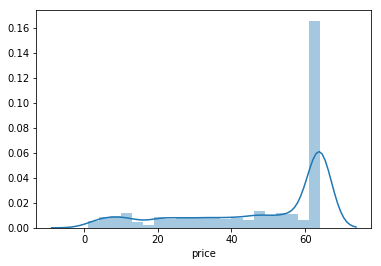

In [31]:
sns.distplot(dias_en_tiendas.price)

## Columna Beneficio

In [28]:
train['beneficio'] = train.price * train.sales

In [37]:
train.groupby('block_id').agg({'price':'count','beneficio':'sum'}).sort_values(['beneficio','price'],ascending=False)

,price,beneficio
block_id,,
2128,1949,499675.35
2037,2660,243420.45
1446,2745,188207.65
1143,2871,172570.81
1521,2636,161824.50
2574,3010,160036.25
9,681,158525.55
487,6495,148477.82
1477,1644,148424.50


# Dataset curva informada

Es un dataset que informa si un producto aparece en un día concreto

In [18]:
# ids_products = train.product_id.unique()

# incompletos = {}
# for j in ids_products:
#     existe = []
#     for i in range(0,64):
#         existe.append(train_g2.index.isin([(i, j)]).any())
#     incompletos[j] = existe
            
# pd.DataFrame(incompletos).to_csv("curva_informada.csv",header=True)
# curvas = pd.DataFrame(incompletos)

curvas = pd.read_csv("curva_informada.csv",index_col=0)

In [19]:
curvas.head()

,151926,213413,310130,455200,571044,658552,671985,759150,836635,940502,...,998991075,999196291,999403909,999506781,999516715,999772605,999794342,999816749,999862351,999936664
0,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
1,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
2,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
3,False,True,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
4,False,True,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True


## Prueba para informar curva

### Seleccion de dataset de prueba

Ejemplo de seleccion de filas en un multiindice.
```py
train_g2.loc[pd.IndexSlice[:,151926], :]
```

In [95]:
prueba_train_expandido =train_g2.loc[pd.IndexSlice[:,151926], :].copy()
prueba_train_expandido

,,price,color_id,size_id,sales,stock,block_id,family_id,subfamily_id
date_number,product_id,,,,,,,,
59,151926,25.95,1,4,5,155,1969,396066037,335531561
60,151926,25.95,1,5,10,330,1969,396066037,335531561
61,151926,25.95,1,5,9,308,1969,396066037,335531561
62,151926,25.95,1,5,9,289,1969,396066037,335531561
63,151926,25.95,1,5,8,261,1969,396066037,335531561


In [96]:
prueba_curvas = curvas['151926']

In [154]:
for index,value in enumerate(prueba_curvas.to_list()):
    if not value:
        prueba_train_expandido.loc[(index,151926),:] = None


### Fill_NA

In [155]:
prueba_train_expandido.loc[:,'price'].fillna(prueba_train_expandido['price'].dropna().unique()[0],inplace=True)
prueba_train_expandido.loc[:,'block_id'].fillna(prueba_train_expandido['block_id'].dropna().unique()[0],inplace=True)
prueba_train_expandido.loc[:,'family_id'].fillna(prueba_train_expandido['family_id'].dropna().unique()[0],inplace=True)
prueba_train_expandido.loc[:,'subfamily_id'].fillna(prueba_train_expandido['subfamily_id'].dropna().unique()[0],inplace=True)

In [156]:
prueba_train_expandido.loc[0,'color_id'] = 0.0
prueba_train_expandido.loc[0,'size_id'] = 0.0
prueba_train_expandido.loc[0,'sales'] = 0.0
prueba_train_expandido.loc[0,'stock'] = 0.0

In [157]:
prueba_train_expandido['color_id'].fillna(method='ffill',inplace=True)
prueba_train_expandido['size_id'].fillna(method='ffill',inplace=True)
prueba_train_expandido['sales'].fillna(method='ffill',inplace=True)
prueba_train_expandido['stock'].fillna(method='ffill',inplace=True)

In [158]:
prueba_train_expandido.sort_index(inplace=True)

## Demostracion Informacion en curva

In [87]:
prueba_plt = curvas[[213413]]

In [92]:
prueba_plt['column_plotable'] = prueba_plt[213413].astype(int)

/home/carlos/Workspaces/Competiciones/entorno_competiciones/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


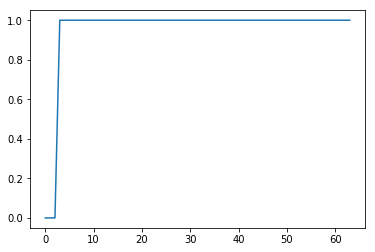

In [98]:
plt.plot(prueba_plt.index.values,prueba_plt['column_plotable'])

In [73]:
curvas[998991075].sum()

64

In [44]:
train_g2.loc[63].shape

(8057, 8)

In [29]:
train.product_id.unique().shape

(8722,)

In [39]:
slice(2, 10)

slice(2, 10, None)

# Export train

In [27]:
train.to_csv("train.csv",header=True,index=True,index_label='index')

In [28]:
!head train.csv

index,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
1,151926,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
2,151926,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
3,151926,396066037,335531561,25.95,1969,59,909958217,820445075,1,42
4,151926,396066037,335531561,25.95,1969,60,909958217,54666687,2,72
5,151926,396066037,335531561,25.95,1969,60,909958217,111455099,2,21
6,151926,396066037,335531561,25.95,1969,60,909958217,242364222,2,95
7,151926,396066037,335531561,25.95,1969,60,909958217,513017386,1,46
8,151926,396066037,335531561,25.95,1969,60,909958217,820445075,3,96
